In [5]:
import pandas as pd
data = pd.read_csv("data/digit-recognizor.csv")

In [6]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
type(data)

pandas.core.frame.DataFrame

In [11]:
data.shape

(42000, 785)

In [80]:
# 方差过滤
X = data.copy()

from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold() # 默认方差为 0
X_var0 = selector.fit_transform(X)

In [13]:
X_var0.shape

(42000, 709)

In [17]:
import numpy as np

x_fsvar = VarianceThreshold(np.median(X.var().values)).fit_transform(X)

In [18]:
X.var().values

array([8.33898537e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.22760590e-01, 2.64689018e+00, 1.11085714e+00,
       1.92857143e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.09523810e-03, 5.41186213e-02, 1.28065733e+00,
       5.33793150e+00, 9.74592647e+00, 1.06219147e+01, 2.49289953e+01,
       3.37671294e+01, 3.59425660e+01, 3.49309575e+01, 3.62943342e+01,
       3.27911079e+01, 3.04237672e+01, 2.95547817e+01, 2.00568398e+01,
       1.19545659e+01, 8.60419724e+00, 2.55465685e+00, 1.60530842e+00,
       9.29377602e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [19]:
np.median(X.var().values)

1325.1294768872046

In [20]:
x_fsvar.shape

(42000, 392)

## kNN 和 RF 在不同方差过滤效果的对比

In [22]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.model_selection import cross_val_score
import numpy as np

In [89]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

In [25]:
x_fsvar = VarianceThreshold(np.median(X.var().values)).fit_transform(X)

In [26]:
# 很慢
# score = cross_val_score(kNN(), x, y, cv=5).mean()
# score = cross_val_score(kNN(), x_fsvar, y, cv=5).mean()

In [27]:
cross_val_score(RFC(n_estimators=10, random_state=0), x, y, cv=5).mean()

0.9373571428571429

In [29]:
cross_val_score(RFC(n_estimators=100, random_state=0), x_fsvar, y, cv=5).mean()

0.9637142857142857

In [30]:
# 相关性过滤

In [31]:
# 卡方过滤

from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [33]:
# 假设需要 300 个特征
x_fschi = SelectKBest(chi2, k=300).fit_transform(x_fsvar, y)

In [34]:
x_fschi.shape

(42000, 300)

In [36]:
cross_val_score(RFC(n_estimators=100, random_state=0), x_fschi, y, cv=5).mean()

0.9597619047619048

In [37]:
# 交叉验证效果变差，说明卡方过滤结果过滤掉了一些有效特征，要么放弃相关性过滤，要么调整 K 值

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

score = []
for i in range(390,200,-10):
    x_fschi = SelectKBest(chi2, k=i).fit_transform(x_fsvar, y)
    once = cross_val_score(RFC(n_estimators=10,random_state=0),x_fschi,y,cv=5).mean()
    score.append(once)


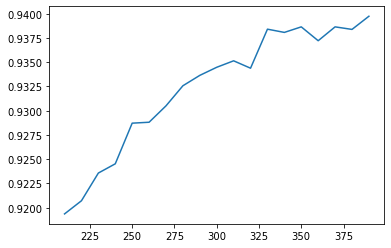

In [40]:
plt.plot(range(390,200,-10),score)
plt.show()

In [42]:
# 卡方检验本质是推测两组数据之间的差异，检验的原假设：两组数据是相互独立的
# 卡方检验返回卡方值和 P 值两个统计量，其中卡方值很难界定有效的范围
# P 值，一般使用 0.01, 0.05 作为显著性水平

# 特征工程角度，希望选取卡方值很大，p值小于 0.05 的特征，即和标签是相关联的特征
# 调用 SelectBest 之前，可以直接从 chi2 实例化后的模型中获得各个特征对应的卡方值和 p 值

In [43]:
chivalue, pvalues_chi = chi2(x_fschi, y)

In [44]:
chivalue

array([1244766.05139164, 1554872.30384525, 1834161.78305343,
       1903618.94085294, 1845226.62427198, 1602117.23307537,
       1188092.19961931, 1319151.43467036, 1397847.8836796 ,
       1433554.26798015, 1429043.15373433, 1332663.17213405,
       1101423.25372261, 1237265.16042373, 1503477.73699155,
       1625807.41495542, 1630206.90922916, 1630597.02883804,
       1633456.72909664, 1610816.75571229, 1483382.49543886,
       1256290.1574794 , 1078344.8724406 , 1226540.98318702,
       1269945.07968831, 1221758.57688808, 1146535.17810241,
       1080657.20185303, 1079065.30979135, 1092222.70610032,
       1064908.45385716, 1212658.65697336, 1279652.35847441,
       1071947.51866571, 1153480.28062008, 1235182.10720641,
       1110286.29490637, 1285689.5977369 , 1412800.83270279,
       1269424.03486304, 1314337.38985735, 1088364.70535319,
       1143964.61799576, 1231934.57606489, 1525266.11466634,
       1624923.27849511, 1120921.66905394, 1249668.53527256,
       1487299.06201808,

In [45]:
pvalues_chi

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [47]:
# 消除所有 p 值大于设定值 0.05 的特征
k = chivalue.shape[0] - (pvalues_chi > 0.05).sum()
k

210

In [48]:
x_fschi = SelectKBest(chi2, k=210).fit_transform(x_fsvar, y)

In [50]:
cross_val_score(RFC(n_estimators=100, random_state=0), x_fschi, y, cv=5).mean()

0.9483095238095238

In [51]:
from sklearn.feature_selection import f_classif

F, pvalues_f = f_classif(x_fsvar, y)

F

array([ 618.65383492,  846.18897012, 1115.40617051, 1362.3677305 ,
       1452.03355369, 1381.09095571, 1138.26505266,  464.29616121,
        660.00977785,  849.66393412, 1004.7450309 , 1124.76177588,
       1200.99190762, 1209.29489877, 1110.4944286 ,  854.66183292,
        577.52063451,  342.09729054,  178.67397866,  118.01145533,
        612.12261014,  899.40904291, 1196.17528948, 1424.49864852,
       1569.26556677, 1742.49910702, 1910.98023795, 1969.20520223,
       1731.37475948, 1295.09668012,  839.15325001,  531.97951763,
        371.82392681,  336.00820537,  378.93378743,  317.47025479,
        528.94881012,  766.40792176,  947.63168717, 1086.0472161 ,
       1177.72017709, 1253.79641973, 1344.06961068, 1507.33781169,
       1616.50454434, 1512.25864876, 1289.65180587, 1051.26276412,
        839.48869386,  680.07426932,  600.85538567,  633.55772663,
        683.96908509,  347.65867784,  452.76238211,  509.16387684,
        515.7498157 ,  532.86107778,  594.62512658,  664.18740

In [52]:
pvalues_f

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 4.71193533e-220,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

In [54]:
k = F.shape[0] - (pvalues_f > 0.05).sum()
k

392

In [55]:
k = F.shape[0] - (pvalues_f > 0.01).sum()
k

392

In [56]:
# 互信息法

from sklearn.feature_selection import mutual_info_classif as MIC

In [57]:
result = MIC(x_fsvar, y)

In [58]:
k = result.shape[0] - sum(result <= 0)
k

392

In [59]:
result

array([0.06760794, 0.08343172, 0.10152626, 0.11217067, 0.11988041,
       0.10723068, 0.08418528, 0.05410592, 0.07333435, 0.10043832,
       0.12418742, 0.13976113, 0.1578996 , 0.16763717, 0.15419645,
       0.13022846, 0.09964649, 0.07269812, 0.03442759, 0.02355325,
       0.06716847, 0.09846263, 0.13109113, 0.14851138, 0.17065645,
       0.21108505, 0.22123374, 0.23336511, 0.22075296, 0.17831568,
       0.13787612, 0.10061488, 0.07908107, 0.06044392, 0.05117031,
       0.03602886, 0.05339221, 0.08012191, 0.10164785, 0.12532429,
       0.14053226, 0.14549166, 0.16626716, 0.19019831, 0.18883638,
       0.17812403, 0.15488437, 0.1375238 , 0.11113617, 0.09770044,
       0.08058612, 0.07134412, 0.065379  , 0.04698627, 0.06174102,
       0.07450313, 0.09035804, 0.100385  , 0.10418943, 0.11491586,
       0.10706583, 0.11194501, 0.12261825, 0.11786817, 0.11843821,
       0.11484887, 0.11138527, 0.1087933 , 0.08988295, 0.07034754,
       0.06833021, 0.04724134, 0.05610818, 0.06537698, 0.07388

In [60]:
# Embedded 嵌入法

from sklearn.feature_selection import SelectFromModel

In [61]:
from sklearn.ensemble import RandomForestClassifier as RFC

RFC_ = RFC(n_estimators=10, random_state=0)

x = data.iloc[:,1:]
y = data.iloc[:,0]

In [90]:
# 0.005这个阈值对于有780个特征的数据来说,是非常高的阈值,因为平均每个特征
# 只能够分到大约0.001的feature_importances_
X_embedded = SelectFromModel(RFC_, threshold=0.005).fit_transform(x, y)

In [91]:
X_embedded.shape

(42000, 47)

In [92]:
# 学习曲线找最佳阈值

import numpy as np
import matplotlib.pyplot as plt

RFC_.fit(x, y).feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.96726660e-06, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.39623410e-06,
       7.35101726e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.70425050e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.09114204e-06, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [93]:
threshold = np.linspace(0, (RFC_.fit(x, y).feature_importances_).max(), 20)

In [94]:
threshold

array([0.        , 0.00067177, 0.00134354, 0.00201531, 0.00268707,
       0.00335884, 0.00403061, 0.00470238, 0.00537415, 0.00604592,
       0.00671769, 0.00738945, 0.00806122, 0.00873299, 0.00940476,
       0.01007653, 0.0107483 , 0.01142007, 0.01209183, 0.0127636 ])

In [95]:
score = []

for i in threshold:
    X_embedded = SelectFromModel(RFC_, threshold=i).fit_transform(x, y)
    print(X_embedded.shape)
    once = cross_val_score(RFC_, X_embedded, y, cv=5).mean() # 用选出的特征跑交叉验证
    score.append(once)
    print("{} {}".format(i, once))

(42000, 784)
0.0 0.9373571428571429
(42000, 324)
0.000671768534115932 0.9391190476190475
(42000, 239)
0.001343537068231864 0.9363571428571429
(42000, 185)
0.002015305602347796 0.9322619047619047
(42000, 138)
0.002687074136463728 0.9274761904761905
(42000, 102)
0.0033588426705796603 0.9215
(42000, 82)
0.004030611204695592 0.9178809523809524
(42000, 55)
0.0047023797388115246 0.9004761904761904
(42000, 43)
0.005374148272927456 0.8911904761904761
(42000, 26)
0.006045916807043388 0.8540952380952381
(42000, 21)
0.0067176853411593206 0.825952380952381
(42000, 12)
0.007389453875275252 0.732142857142857
(42000, 11)
0.008061222409391184 0.6951428571428572
(42000, 11)
0.008732990943507116 0.6951428571428572
(42000, 10)
0.009404759477623049 0.6667142857142858
(42000, 6)
0.01007652801173898 0.5254285714285715
(42000, 2)
0.010748296545854913 0.26502380952380955
(42000, 1)
0.011420065079970844 0.18942857142857142
(42000, 1)
0.012091833614086776 0.18942857142857142
(42000, 1)
0.01276360214820271 0.189

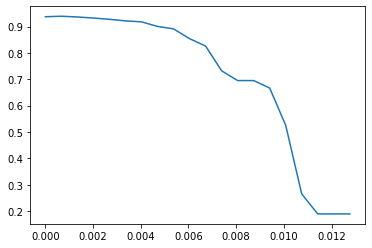

In [96]:
plt.plot(threshold, score)
plt.show()

In [97]:
X_embedded = SelectFromModel(RFC_,threshold=0.000671768534115932).fit_transform(x, y)
X_embedded.shape
cross_val_score(RFC_,X_embedded,y,cv=5).mean()

0.9391190476190475

In [98]:
# 包装法 Wrapper

In [99]:
from sklearn.feature_selection import RFE

In [100]:
RFC_ = RFC(n_estimators=10, random_state=0)

In [101]:
selector = RFE(RFC_, n_features_to_select=340, step=50).fit(X, y)

In [102]:
selector.support_.sum()

340

In [103]:
selector.ranking_

array([ 1,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        7,  7,  7,  7,  7,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  5,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  6,  5,  6,  4,
        5,  4,  3,  2,  4,  4,  6,  5,  5,  8,  7,  8,  7,  8,  7,  8,  8,
        8,  8,  8,  6,  8,  8,  5,  5,  4,  4,  3,  1,  2,  1,  1,  1,  1,
        1,  1,  1,  1,  4,  4,  5,  5,  8,  9,  9,  9,  9,  9,  9,  9,  5,
        6,  3,  2,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  4,
        4,  4,  6,  9,  9,  9, 10, 10, 10, 10,  5,  4,  3,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  3,  4,  9, 10, 10,
       10, 10, 10,  5,  4,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  2,  3,  4, 10, 10, 10,  8, 10, 10,  4,  3,  3,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  4,  5, 10, 10

In [104]:
x_wrapper = selector.transform(X)

In [105]:
cross_val_score(RFC_, x_wrapper, y, cv=5).mean()

0.9691666666666666

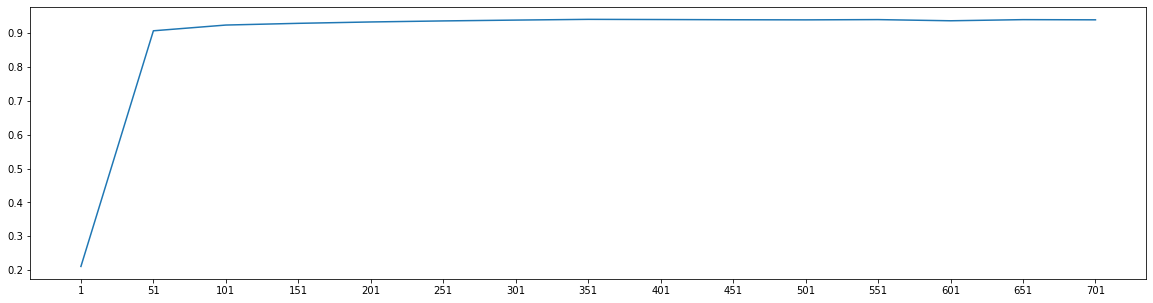

In [106]:
score = []
for i in range(1,751,50):
    x_wrapper = RFE(RFC_,n_features_to_select=i, step=50).fit_transform(x,y)
    once = cross_val_score(RFC_,x_wrapper,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,751,50),score)
plt.xticks(range(1,751,50))
plt.show()